In [136]:
using DrWatson
@quickactivate "wrips-code"

In [185]:
using Flux
using Suppressor, Plots, Pipe
using Ripserer, PersistenceDiagrams, PersistenceDiagramsBase

In [139]:
include(srcdir("wRips.jl"))
import Main.wRips

In [140]:
images = Flux.Data.MNIST.images();
labels = Flux.Data.MNIST.labels();

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /storage/home/s/suv87/work/julia_depot/packages/Flux/qAdFM/src/data/Data.jl:16
┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /storage/home/s/suv87/work/julia_depot/packages/Flux/qAdFM/src/data/Data.jl:16


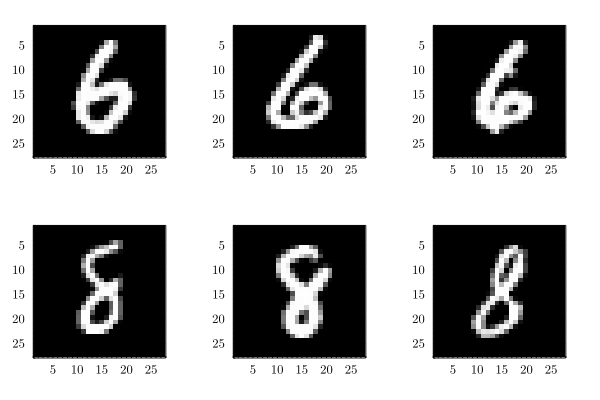

In [141]:
id6 = findall(x -> x == 6, labels)
id8 = findall(x -> x == 8, labels)

plot( 
    [plot(images[i]) for i in rand(id6, 3)]...,
    [plot(images[i]) for i in rand(id8, 3)]...
)

In [173]:
i = 6
img = images[id6[6]]

In [176]:
function convert(X)
    if typeof(X) <: Matrix{<:Number}
        return Gray.(X)
    elseif typeof(X) <: Matrix{<:Gray}
        return map( x-> Base.convert(Float16, x), gray.(X))
    else
        @error "Not a valid datatype"
    end
end

convert (generic function with 1 method)

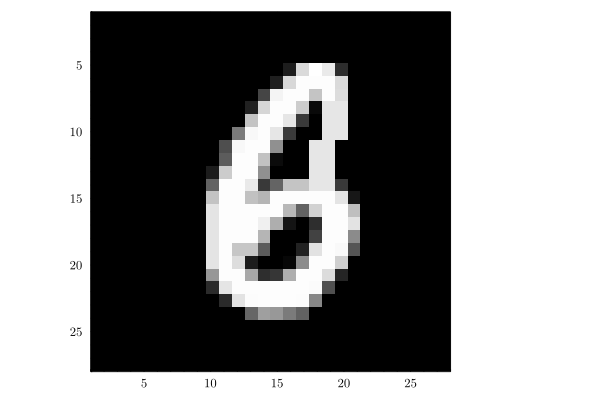

In [241]:
img_matrix = @pipe img |> convert
for u in 8:14, v in 19:20
    img_matrix[u,v - div(u, 11)] = 0.9
end
img_matrix |> convert |> plot

In [246]:
img_matrix
Xn = []Any

MethodError: MethodError: no method matching *(::Vector{Any}, ::Type{Any})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at /storage/work/s/suv87/julia_install/julia-1.7.1/share/julia/base/operators.jl:655
  *(::StridedVecOrMat, !Matched::LinearAlgebra.Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}) at /storage/work/s/suv87/julia_install/julia-1.7.1/share/julia/stdlib/v1.7/LinearAlgebra/src/lq.jl:266
  *(::StridedVecOrMat, !Matched::LinearAlgebra.LQPackedQ) at /storage/work/s/suv87/julia_install/julia-1.7.1/share/julia/stdlib/v1.7/LinearAlgebra/src/lq.jl:290
  ...